In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
import os
import fnmatch

In [42]:
#Partie 1 > d > 1,2,3,4,5

np.random.seed(2)
X = np.random.rand(1000)*3

Moyenne = round(sum(X)/len(X),3)
Ecart_Type = round(np.std(X),3)
Mediane = round(np.median(X),3)

print(Moyenne," ", Ecart_Type, " ", Mediane)

X_Bis = np.random.rand(1000)*3

Moyenne = round(sum(X_Bis)/len(X_Bis),3)
Ecart_Type = round(np.std(X_Bis),3)
Mediane = round(np.median(X_Bis),3)

print(Moyenne," ", Ecart_Type, " ", Mediane)

1.462   0.852   1.409
1.461   0.884   1.413


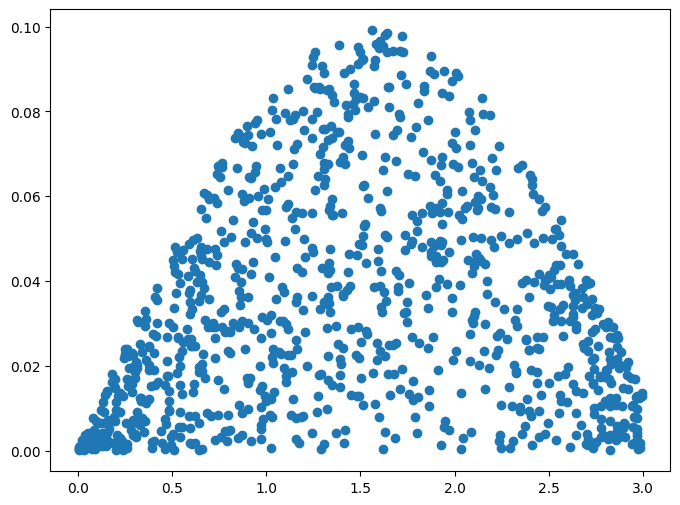

In [43]:
#Partie 1 > d > 7,8

noise = np.random.rand(1000)
y = np.sin(X)*(noise*0.1)

plt.figure(figsize=(8,6))
plt.scatter(X,y)
plt.show()

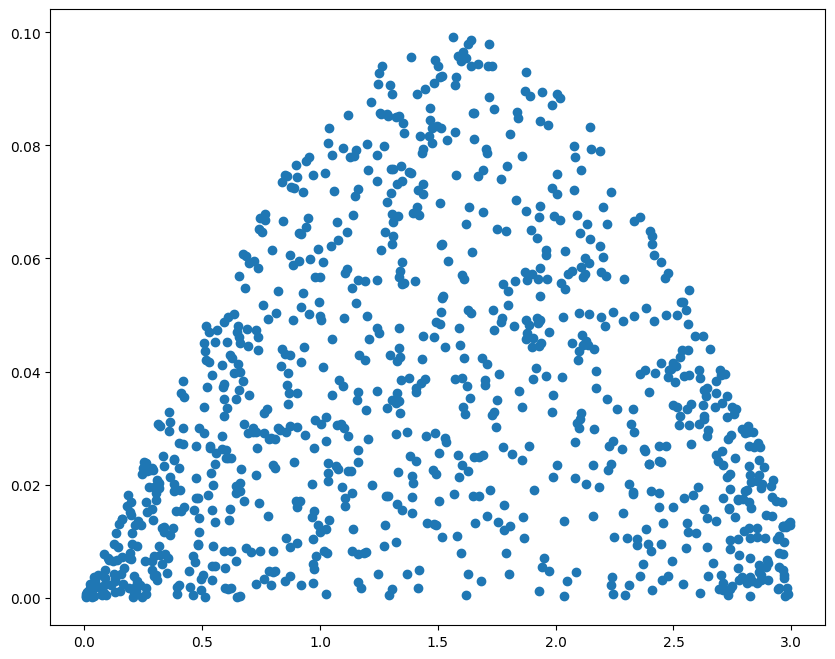

In [44]:
#Partie 1 > d > 9

plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.show()

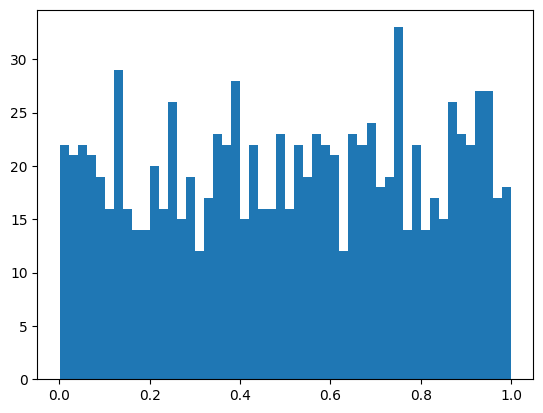

In [45]:
#Partie 1 > d > 10,11

plt.hist(noise,bins=50)
plt.show()

In [16]:
# Partie 2 > Données

# A
absolute_path = os.getcwd()
relative_path = "src\data1"
full_path = os.path.join(absolute_path, relative_path)
print(full_path)
_,_, files = next(os.walk(full_path))
print(len(files))

count = len(fnmatch.filter(os.listdir(full_path), '*.*'))
print('File Count:', count)


c:\Users\max_m\Documents\3-Ecole\Computer Vision\ComputerVisionTP\src\data1
0
File Count: 0


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\max_m\AppData\Local\Temp\ipykernel_37108\976951639.py:5: SyntaxWarning: invalid escape sequence '\d'
  relative_path = "src\data1"
